This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

In [3]:
import pandas as pd

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/bundickm/Study-Guides/master/data/cannabis.csv')
print('Shape:', df.shape, '\n')
df.head()

Shape: (2351, 6) 



,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


# Tokens

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Natural Language Processing**: `Natural Language Processing is a branch of artificial intelligence that deals with the interaction between computers and humans using the natural language.Most NLP techniques rely on machine learning to derive meaning from human languages.`

**Token**: `A token is an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing.`

**Corpus**: `In linguistics and NLP, corpus (literally Latin for body) refers to a collection of texts.`

**Stopwords**: `In NLP, useless words (data), are referred to as stop words. A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query`

**Statistical Trimming**: `Your Answer Here`

**Stemming**: `Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form.`

**Lemmatization**: `Lemmatization is a dictionary based technique. Therefore, Lemmatization is more accurate on the other hand it is slow in processing as it has to look up the dictionary. The base form of a word in this case is called Lemma.`

**Vectorization**: `Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which are used to find word predictions, word similarities/semantics.`

## Questions of Understanding

1. What are at least 4 common cleaning tasks you need to do when creating tokens?
 1. `Case normalization`
 2. `Keeping only alphanumeric characters`
 3. `Removing stop words`
 4. `Statistical trimming`

2. Why is it important to apply custom stopwords to our dataset in addition to the ones that come in a library like spaCy?
```
Because the stop words are often unique to the context of the project.
```

3. Explain the tradeoffs between statistical trimming, stemming, and lemmatizing.
```
Stemming, as the name represents, finds the stem of a word. Example, stem of 'going' is 'go'. In stemming, the base form of a word is identified by chopping the word. Lemmatization is also used for the same purpose but it is more accurate than stemming. Therefore, Lemmatization is more accurate on the other hand it is slow in processing as it has to look up the dictionary. Statistical trimming "trims" the outliers in an attempt to collect only the most impactful data.
```

4. Why do we need to vectorize our documents?
```
Because the ML algorithms process math - not language in its natural form.
```

## Practice Problems

Write a function to tokenize the `Description` column. Make sure to include the following:
- Return the tokens in an iterable structure
- Normalize the case
- Remove non-alphanumeric characters such as punctuation, whitespace, unicode, etc.
- Apply stopwords and make sure to add stopwords specific to this dataset
- Lemmatize the tokens before returning them

In [38]:
# import re
# def tokenize(text):
#     tokens = text.lower().split()
#     tokens = re.sub('[^a-zA-Z 0-9]', '', text)
#     return tokens

# df['tokens'] = df['Description'].apply(tokenize)

In [56]:
df.isnull().sum()

Strain         0
Type           0
Rating         0
Effects        0
Flavor         0
Description    0
dtype: int64

In [53]:
df["Description"].fillna( method ='ffill', inplace = True)

In [54]:
df["Flavor"].fillna( method ='ffill', inplace = True)

In [91]:
STOP_WORDS = ['strain','effects']

Apply your function to `Description` and save the resulting tokens in a new column, `Tokens`

In [140]:
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

def spacey_pipe_toke(df, STOP_WORDS):
    """
    Takes dataframe['and_column'] as input
    Along with a list of stop words -
    Returns a tokenized column.
    Couldnt figure out how to fit in lemma.
    """
    df = df.copy()
    sw = nlp.Defaults.stop_words.union(STOP_WORDS)
    tokens = []
    for doc in tokenizer.pipe(df, batch_size=500):   
        doc_tokens = []   
        for token in doc: 
            if ((token.text.lower() not in sw) and (token.is_stop != True) and (token.pos_ != 'PRON')) and (token.is_punct !=True) and (token.is_space != True):
                doc_tokens.append(token.lemma_.strip().lower())

        tokens.append(doc_tokens)    
    df['tokens'] = tokens    
    return df['tokens']


In [141]:
df['tokens'] = spacey_pipe_toke(df['Description'], STOP_WORDS)

In [142]:
df

,Strain,Type,Rating,Effects,Flavor,Description,tokens
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,"[$100, og, 50/50, hybrid, pack, strong, punch...."
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,"[‘98, aloha, white, widow, especially, potent,..."
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,"[1024, sativa-dominant, hybrid, breed, spain, ..."
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,"[13, dawgs, hybrid, g13, chemdawg, genetic, br..."
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...","[know, kosher, tangie,, 24k, gold, 60%, indica..."
...,...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",Zeus OG is a hybrid cross between Pineapple OG...,"[zeus, og, hybrid, cross, pineapple, og, deadh..."
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",Zkittlez is an indica-dominant mix of Grape Ap...,"[zkittlez, indica-dominant, mix, grape, ape, g..."
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",Zombie Kush by Ripper Seeds comes from two dif...,"[zombie, kush, ripper, seeds, come, different,..."
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",If you’re looking to transform into a flesh-ea...,"[you’re, look, transform, flesh-eating, monste..."


In [143]:
df['tokens']

0       [$100, og, 50/50, hybrid, pack, strong, punch....
1       [‘98, aloha, white, widow, especially, potent,...
2       [1024, sativa-dominant, hybrid, breed, spain, ...
3       [13, dawgs, hybrid, g13, chemdawg, genetic, br...
4       [know, kosher, tangie,, 24k, gold, 60%, indica...
                              ...                        
2346    [zeus, og, hybrid, cross, pineapple, og, deadh...
2347    [zkittlez, indica-dominant, mix, grape, ape, g...
2348    [zombie, kush, ripper, seeds, come, different,...
2349    [you’re, look, transform, flesh-eating, monste...
2350    [zoom, pie, (also, know, zombie, pie), heavy, ...
Name: tokens, Length: 2351, dtype: object

In [144]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('hybrid', 1149),
 ('cross', 1010),
 ('og', 898),
 ('aroma', 748),
 ('kush', 723),
 ('indica', 697),
 ('sweet', 661),
 ('bud', 640),
 ('flower', 608),
 ('sativa', 575)]

Use the function below to create a `word_count` dataframe based off the `df['Tokens']` column you created.

In [134]:
def count(docs):
        word_counts = Counter()
        appears_in = Counter()
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [137]:
word_count = count(df['tokens'])

Run the line of code below, and then explain how to interpret the graph.

```
Your Answer Here
```

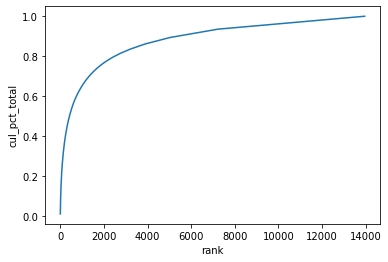

In [138]:
import seaborn as sns
sns.lineplot(x='rank', y='cul_pct_total', data=word_count);


# It looks that under 200 words represent about 80% of all words in the corpus.
# Often means we could benefit from trimming the extremities.

# Vectorization

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Spacy SHOULD be able to Handle most weird stuf")
exa = pd.DataFrame()
for token in doc:
    tmp = pd.DataFrame({f"text": token.text,
                        "lemma_": token.lemma_,
                        "pos_": token.pos_,
                        "tag_": token.tag_,
                        "dep_": token.dep_,
                        "shape": token.shape_,
                        "is_alpha": token.is_alpha,
                        "is_stop": token.is_stop
                        },
                       index=[f"{token}"]
                       )
    exa = pd.concat([exa, tmp])
exa.T

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Vectorization**: `Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which are used to find word predictions, word similarities/semantics`

**Document Term Matrix (DTM)**: `A document-term matrix or term-document matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms.`

**Latent Semantic Analysis**: `Latent semantic analysis (LSA) is a technique in natural language processing, in particular distributional semantics, of analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms. LSA assumes that words that are close in meaning will occur in similar pieces of text (the distributional hypothesis)`

**Term Frequency - Inverse Document Frequency (TF-IDF)**: `The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.`

**Word Embedding**: `Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.`

**N-Gram**: `In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus.`

**Skip-Gram**: `Skip-gram is used to predict the context word for a given target word.`

## Questions of Understanding

1. Why do we need to vectorize our documents?
```
Computers do not understand text and the relations between words and sentences, so you need a way to represent these words with numbers which is what computers understand.
```

2. How is TF-IDF different from simple word frequency? Why do we use TF-IDF over word frequency?
```
With TF-IDF, words are given weight – TF-IDF measures relevance, not frequency. That is, wordcounts are replaced with TF-IDF scores across the whole dataset.
```

3. Why might we choose a word embedding approach over a bag-of-words approach when it comes to vectorization?
```
To preserve the interalational aspect of the words as they become numbers.
```

## Practice Problems

Use the dataframe `df` above to complete the following.

Vectorize the `Tokens` column.

In [165]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def dummy(doc):
    return doc

vect = CountVectorizer(
        tokenizer=dummy,
        preprocessor=dummy,
    )  

docs = df['tokens']

vect.fit(docs)
# cv.get_feature_names()


C:\Users\mrmcd\Anaconda3\envs\US4-S1-NLP\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1),
                preprocessor=<function dummy at 0x000001E1D35CB268>,
                stop_words=None, strip_accents=None,
                token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function dummy at 0x000001E1D35CB268>,
                vocabulary=None)

In [158]:
dtm = vect.transform(df['tokens'])

In [167]:

def tfidf_dummy(doc):
    return doc

tfidf_vect = TfidfVectorizer(
        tokenizer=tfidf_dummy,
        preprocessor=tfidf_dummy,
    )  

docs = df['tokens']

tfidf_vect.fit(docs)
# cv.get_feature_names()


# tfidf = TfidfVectorizer()

# dtm2 = tfidf.fit_transform(df['tokens'])

# dtm_tfidf = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

# nn.fit(dtm2)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2',
                preprocessor=<function tfidf_dummy at 0x000001E1D35CB048>,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tfidf_dummy at 0x000001E1D35CB048>,
                use_idf=True, vocabulary=None)

In [168]:
dtm2 = tfidf_vect.transform(df['tokens'])

In [169]:
dtm_df2 = pd.DataFrame(dtm2.todense(), columns=tfidf_vect.get_feature_names())

In [170]:
nn.fit(dtm_df2)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

Build a Nearest Neighbors model from your dataframe and then find the 5 nearest neighbors to the strain "100-OG"

In [159]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')

dtm_df = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

nn.fit(dtm_df)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [173]:
new = tfidf_vect.transform(strain)

In [174]:
nn.kneighbors(new.todense())

(array([[1.        , 1.        , 1.        , 1.        , 1.08718181]]),
 array([[1652, 1653, 1749, 1651, 1488]], dtype=int64))

In [179]:
dtm_df.iloc[1488]

#1          0
#1,         0
#1.         0
#10         0
#10,        0
           ..
“white”     0
“wookie”    0
“wtf!”      0
“y,”        0
“z’s.”      0
Name: 1488, Length: 12593, dtype: int64

In [160]:
nn.kneighbors([dtm_df.iloc[0].values])

(array([[0.        , 6.70820393, 6.70820393, 6.70820393, 6.70820393]]),
 array([[   0, 1651,  191, 1653, 1652]], dtype=int64))

In [161]:
nn.kneighbors([dtm_df.iloc[191]])

(array([[0.        , 3.16227766, 3.16227766, 3.16227766, 3.16227766]]),
 array([[ 191, 1652, 1651, 1749, 1653]], dtype=int64))

In [172]:
strain = ["100-OG"]

You will be putting together a classification model below, but before you do you'll need a baseline. Run the line of code below and then find the normalized value counts for the `Rating` column in `df`.

In [180]:
df['Rating'] = df['Rating'].round().astype(int)

In [188]:
df['Rating'].value_counts(normalize=True).max()

0.6022968949383242

What is the baseline accuracy?
```
60%
```

Visualize the rating counts from above

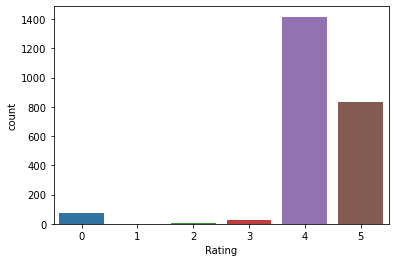

In [189]:
sns.countplot(df['Rating']);

Use your vectorized tokens in the `df` dataframe to train a classification model

In [200]:
df

,Strain,Type,Rating,Effects,Flavor,Description,tokens
0,100-Og,hybrid,4,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,"[$100, og, 50/50, hybrid, pack, strong, punch...."
1,98-White-Widow,hybrid,5,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,"[‘98, aloha, white, widow, especially, potent,..."
2,1024,sativa,4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,"[1024, sativa-dominant, hybrid, breed, spain, ..."
3,13-Dawgs,hybrid,4,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,"[13, dawgs, hybrid, g13, chemdawg, genetic, br..."
4,24K-Gold,hybrid,5,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...","[know, kosher, tangie,, 24k, gold, 60%, indica..."
...,...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,5,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",Zeus OG is a hybrid cross between Pineapple OG...,"[zeus, og, hybrid, cross, pineapple, og, deadh..."
2347,Zkittlez,indica,5,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",Zkittlez is an indica-dominant mix of Grape Ap...,"[zkittlez, indica-dominant, mix, grape, ape, g..."
2348,Zombie-Kush,indica,5,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",Zombie Kush by Ripper Seeds comes from two dif...,"[zombie, kush, ripper, seeds, come, different,..."
2349,Zombie-Og,indica,4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",If you’re looking to transform into a flesh-ea...,"[you’re, look, transform, flesh-eating, monste..."


In [199]:
# Import Statements
from sklearn.ensemble import RandomForestClassifier

data = df['Description']
target = df['Description']

vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=5)
rfc = RandomForestClassifier()

rfc.fit(data, target)


ValueError: setting an array element with a sequence.

In [197]:
dtm_df

,#1,"#1,",#1.,#10,"#10,",#13,#18,"#18,",#18.,#1’s,...,“ubc,“uk,“unholy”,"“wait,",“warm,“white”,“wookie”,“wtf!”,"“y,”",“z’s.”
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
afgooey = ["Afgooey, also known as Afgoo, is a potent indica strain that is believed to descend from an Afghani indica and Maui Haze. Its sativa parent may lend Afgoo some uplifting, creative qualities, but this strain undoubtedly takes after its indica parent as it primarily delivers relaxing, sleepy effects alongside its earthy pine flavor. Growers hoping to cultivate Afgoo may have a better chance of success indoors, but this indica can also thrive in Mediterranean climates outdoors." ]

Predict the score of the fake strain description below.

```
'Afgooey, also known as Afgoo, is a potent indica strain that is believed to descend from an Afghani indica and Maui Haze. 
Its sativa parent may lend Afgoo some uplifting, creative qualities, but this strain undoubtedly takes after its indica 
parent as it primarily delivers relaxing, sleepy effects alongside its earthy pine flavor. Growers hoping to cultivate Afgoo 
may have a better chance of success indoors, but this indica can also thrive in Mediterranean climates outdoors.'
```

In [196]:
rfc.predict(['Send me lots of money now', 'you won the lottery in Nigeria'])

ValueError: could not convert string to float: 'Send me lots of money now'

# Topic Modeling

## Questions of Understanding

1. What is Latent Dirichlet Allocation? What is another name for LDA in NLP?
```
Your Answer Here
```

2. How do interpret the results of a topic modeling output?
```
Your Answer Here
```

## Practice Problems

Find the top 5 topics of the `Description` column using LDA

In a short paragraph, explain how to interpret the first topic your model came up with. If your topic words are difficult to interpret, explain how you could clean up the descriptions to improve your topics

```
Your Answer Here
```

Use `pyLDAvis` to create a visualization to help you interpret your topic modeling results

Explain how to interpret the results of `pyLDAvis`

```
Your Answer Here
```

Create at least 1 more visualization to help you interpret the results of your topic modeling